In [47]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [48]:
book = pd.read_csv("book.csv")

In [49]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [50]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# EDA

In [51]:
#Generating list of Purchased and Not Purchased 
zero = []
one = []

for i in book.columns:
    zero.append(list(book[i].value_counts())[0])
    one.append(list(book[i].value_counts())[1])

In [52]:
count_df = pd.DataFrame([zero,one], columns=book.copy().columns)
count_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [53]:
#counting how many books are purchased

count_df.index = ['Not_Purchased', 'Purchased']
count_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
Not_Purchased,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
Purchased,846,495,862,564,429,482,552,227,74,97,217


In [54]:
print("Maximum purchased item:" ,count_df.idxmax(axis=1)[1],':',count_df.loc['Purchased'].max())
print("Minimum purchased item:" ,count_df.idxmax(axis=1)[0],':',count_df.loc['Not_Purchased'].max())

Maximum purchased item: CookBks : 862
Minimum purchased item: ItalAtlas : 1926


In [55]:
sorted_df = pd.DataFrame(count_df.sort_values(by = ['Purchased'], axis=1, ascending=False).transpose())
sorted_df

,Not_Purchased,Purchased
CookBks,1138,862
ChildBks,1154,846
DoItYBks,1436,564
GeogBks,1448,552
YouthBks,1505,495
ArtBks,1518,482
RefBks,1571,429
ItalCook,1773,227
Florence,1783,217
ItalArt,1903,97


Most Purchased book is CookBks. While the ItalAtlas is least Purchased book.

In [56]:
#percentage of books purchased

sorted_df['Purchased %']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df

,Not_Purchased,Purchased,Purchased %
CookBks,1138,862,0.177915
ChildBks,1154,846,0.174613
DoItYBks,1436,564,0.116409
GeogBks,1448,552,0.113932
YouthBks,1505,495,0.102167
ArtBks,1518,482,0.099484
RefBks,1571,429,0.088545
ItalCook,1773,227,0.046852
Florence,1783,217,0.044788
ItalArt,1903,97,0.020021


In [57]:
np.mean(sorted_df['Purchased %'])

0.0909090909090909

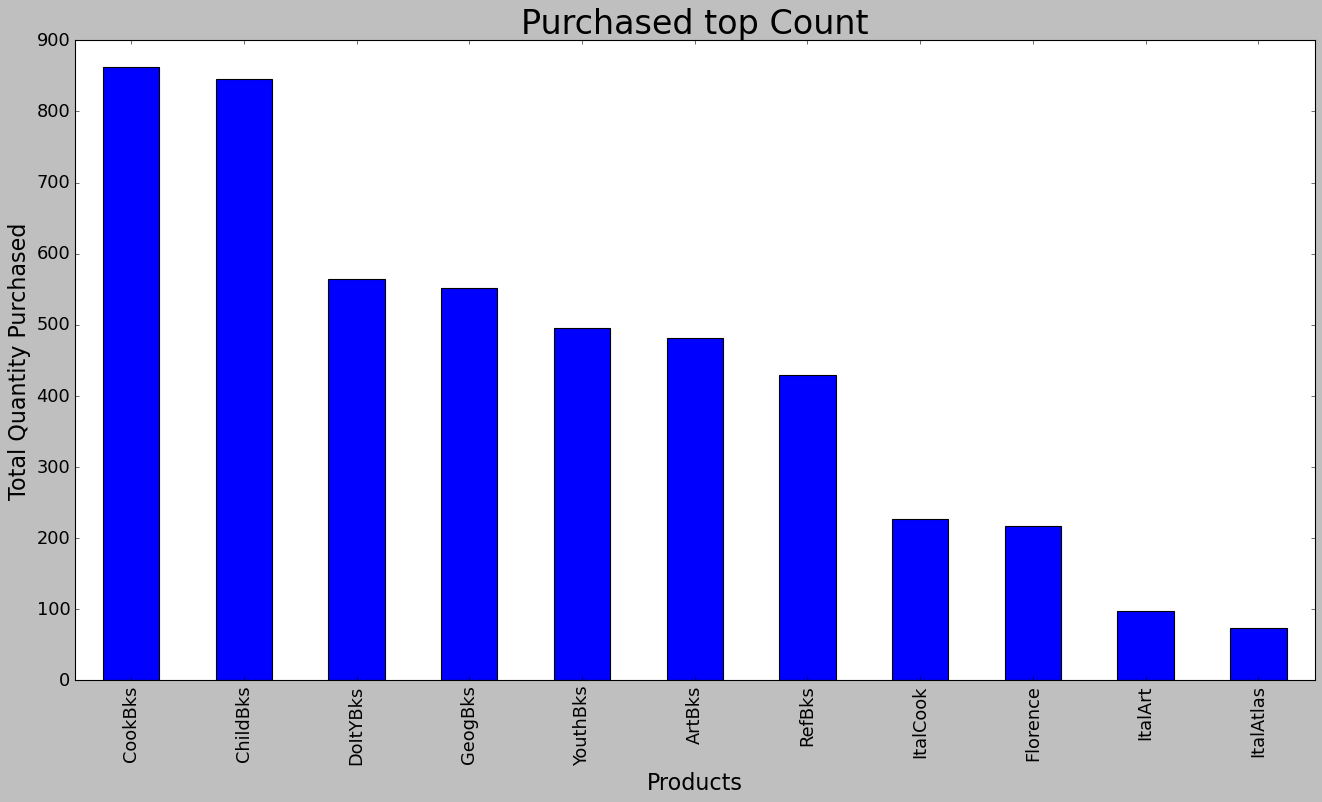

In [58]:
fig = plt.subplots(figsize=(20,10))

purchased = sorted_df.head(50).xs('Purchased' , axis=1)

purchased.plot(kind='bar', fontsize=16)

plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('Total Quantity Purchased', fontsize=20)
plt.show()

<li>Percentage of CookBks, ChildBks have the highest Percentage.
<li>ItalCook, Florence, ItalArt, ItalATlas have the Leat Percentage.
<li>DoltYBks, GeogBks, YouthBks, ArtBks, RefBks have median Percentage.

# Using Apriori Rule

In [59]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(book, min_support=0.05, use_colnames=True, max_len=3)

In [60]:
freq_items.tail(10)

,support,itemsets
66,0.0585,"(ItalCook, CookBks, DoItYBks)"
67,0.0700,"(ArtBks, CookBks, RefBks)"
68,0.0890,"(CookBks, RefBks, GeogBks)"
69,0.1035,"(ArtBks, CookBks, GeogBks)"
70,0.0565,"(ArtBks, ItalCook, CookBks)"
71,0.0640,"(ItalCook, CookBks, GeogBks)"
72,0.0535,"(ArtBks, DoItYBks, RefBks)"
73,0.0585,"(GeogBks, DoItYBks, RefBks)"
74,0.0730,"(ArtBks, DoItYBks, GeogBks)"
75,0.0565,"(ArtBks, RefBks, GeogBks)"


#### Building association rules using confidence metrics

In [61]:
confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

In [62]:
confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
269,"(GeogBks, DoItYBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
270,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
271,(DoItYBks),"(ArtBks, GeogBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
272,(GeogBks),"(ArtBks, DoItYBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
273,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
274,"(ArtBks, GeogBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
275,"(GeogBks, RefBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
276,(ArtBks),"(GeogBks, RefBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
277,(RefBks),"(ArtBks, GeogBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502
278,(GeogBks),"(ArtBks, RefBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866


#### Building Association rules using lift metrics

In [63]:
lift_association = association_rules(freq_items, metric='lift', min_threshold=1)

In [64]:
lift_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
284,"(GeogBks, DoItYBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
285,(ArtBks),"(GeogBks, DoItYBks)",0.2410,0.1325,0.0730,0.302905,2.286072,0.041067,1.244449
286,(DoItYBks),"(ArtBks, GeogBks)",0.2820,0.1275,0.0730,0.258865,2.030316,0.037045,1.177249
287,(GeogBks),"(ArtBks, DoItYBks)",0.2760,0.1235,0.0730,0.264493,2.141642,0.038914,1.191695
288,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
289,"(ArtBks, GeogBks)",(RefBks),0.1275,0.2145,0.0565,0.443137,2.065908,0.029151,1.410581
290,"(GeogBks, RefBks)",(ArtBks),0.1105,0.2410,0.0565,0.511312,2.121627,0.029870,1.553139
291,(ArtBks),"(GeogBks, RefBks)",0.2410,0.1105,0.0565,0.234440,2.121627,0.029870,1.161894
292,(RefBks),"(ArtBks, GeogBks)",0.2145,0.1275,0.0565,0.263403,2.065908,0.029151,1.184502
293,(GeogBks),"(ArtBks, RefBks)",0.2760,0.0895,0.0565,0.204710,2.287264,0.031798,1.144866


# Removing Redundancy

Removing redundant sets

In [99]:
redundancy = lift_association.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()

redundancy.head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,102,"(CookBks, ChildBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,107,(GeogBks),"(CookBks, ChildBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,11,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,10,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,84,"(CookBks, ChildBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
5,89,(DoItYBks),"(CookBks, ChildBks)",0.282,0.256,0.1460,0.517730,2.022385,0.073808,1.542706
6,3,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
7,2,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
8,33,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
9,32,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361


In [66]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
289,"(CookBks, ItalCook)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(CookBks, ItalCook)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(ItalCook, GeogBks)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130
293,(ChildBks),"(ItalCook, GeogBks)",0.4230,0.0640,0.0525,0.124113,1.939273,0.025428,1.068632


In [100]:
redundancy = redundancy.drop(['index'], axis=1)

redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
...,...,...,...,...,...,...,...,...,...
289,"(CookBks, ItalCook)",(DoItYBks),0.1135,0.2820,0.0585,0.515419,1.827725,0.026493,1.481691
290,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
291,(DoItYBks),"(CookBks, ItalCook)",0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
292,"(ItalCook, GeogBks)",(ChildBks),0.0640,0.4230,0.0525,0.820312,1.939273,0.025428,3.211130


**An leverage value of 0 indicates independence. Range will be [-1 1].**





**A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]**

# Finding Unique Sets

In [67]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(294, 9)

In [68]:
unique_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CookBks, ChildBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(CookBks, ChildBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(CookBks, ChildBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


Lift value for ChildBks, CookBks and GeogBks, DoItYBks is quite high (>1.5). We can say that these are bought together.

# Generated Rules analysis

In [69]:
#Rules sorted with respect to lift

top_sort = unique_rules[unique_rules['lift']>1.5]

In [70]:
top_sored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CookBks, ChildBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
1,(GeogBks),"(CookBks, ChildBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,"(CookBks, ChildBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


**ChildBks, CookBks, GeogBks have a lift of >1.5**

In [71]:
x = top_sort[['antecedents','consequents']]

In [72]:
# top sorted Antecedents

item_list = [] 
for i in x.antecedents.to_list(): 
    for j in list(set(i)):
        item_list.append(j)  

In [73]:
# top sorted consequents

item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [74]:
#generating unique list of items (# without redundacy)

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    
    # convert the set to the list 
    unique_list = (list(list_set))
    
    top_items =[]
    for m in unique_list:
        top_items.append(m)
        
    print(top_items)

### Concluding top_items and the shuffled combination of top lift result

In [75]:
unique(item_list) #number of Unique Books

['GeogBks', 'ChildBks', 'CookBks', 'DoItYBks', 'ArtBks', 'ItalCook', 'RefBks', 'YouthBks']


<li> Unique list of books that can be coupled together are listed above.
<li> We can use these items to group together to increase the sales.
<li> We can further analyze with different support, confidence values, and min_threshold to generate different sets.

### Trying different values of Min_support, Metric, Max_len, and Min_thershold

In [76]:
frequent_books_s = apriori(book, min_support = 0.005, max_len = 3, use_colnames = True)

In [77]:
#sorting with respect to support
frequent_books_s.sort_values("support", ascending = False, inplace = True)

In [78]:
#generating association rules
rules = association_rules(frequent_books_s, metric = "lift", min_threshold= 1)

In [79]:
#sorting rules with respect to lift
rules.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
355,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
565,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
560,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
921,"(GeogBks, ItalAtlas)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
924,(ItalArt),"(GeogBks, ItalAtlas)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939


In [80]:
rules_r = rules.sort_values('lift', ascending = False)

## Min_support = 0.005, Max_len = 5, Lift, Min_threshold=1

In [81]:
frequent_books_2 = apriori(book, min_support = 0.005, max_len = 5, use_colnames = True)
rules2 = association_rules(frequent_books_2, metric = "lift", min_threshold= 1)

## Min_support = 0.005, Max_len = 4, Lift, Min_threshold=1

In [82]:
frequent_books_3 = apriori(book, min_support = 0.005, max_len = 4, use_colnames = True)
rules3 = association_rules(frequent_books_3, metric = "lift", min_threshold= 1)

## Min_support = 0.01, Max_len = 3, Lift, Min_threshold=1.5

In [83]:
frequent_books_4 = apriori(book, min_support = 0.01, max_len = 3, use_colnames = True)
rules4 = association_rules(frequent_books_4, metric = "lift", min_threshold= 1.5)

## Min_support = 0.05, Max_len = 3, Confidence, Min_threshold = 0.8

In [84]:
frequent_books_5 = apriori(book, min_support = 0.05, max_len = 3, use_colnames = True)
rules5 = association_rules(frequent_books_5, metric = "confidence", min_threshold= 0.8)

## Min_support = 0.1, Max_len = 3, Confidence, Min_threshold = 0.8

In [85]:
frequent_books_6 = apriori(book, min_support = 0.1, max_len = 3, use_colnames = True)
rules6 = association_rules(frequent_books_6, metric = "confidence", min_threshold= 0.8)

In [86]:
# Generating list for support and confidence

support=rules['support']
confidence=rules['confidence']


# Bar Plots 

Text(0, 0.5, 'Support')

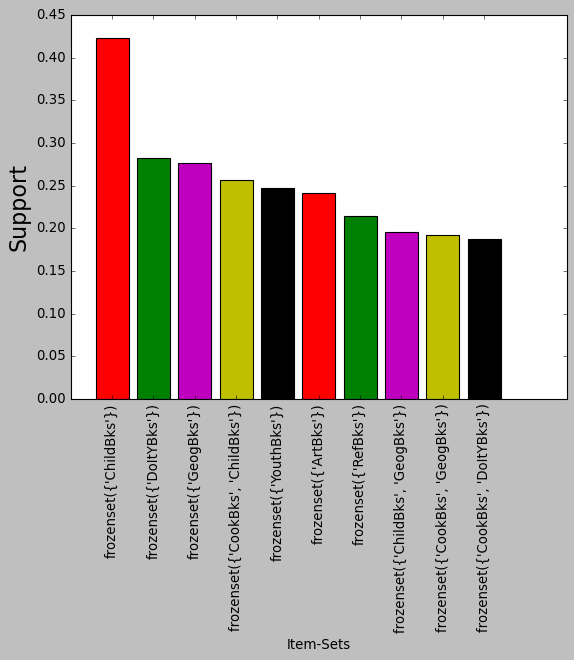

In [87]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_s.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_s.itemsets[1:11],rotation ='vertical')
plt.xlabel('Item-Sets');plt.ylabel('Support', fontsize=20)


Text(0, 0.5, 'Support')

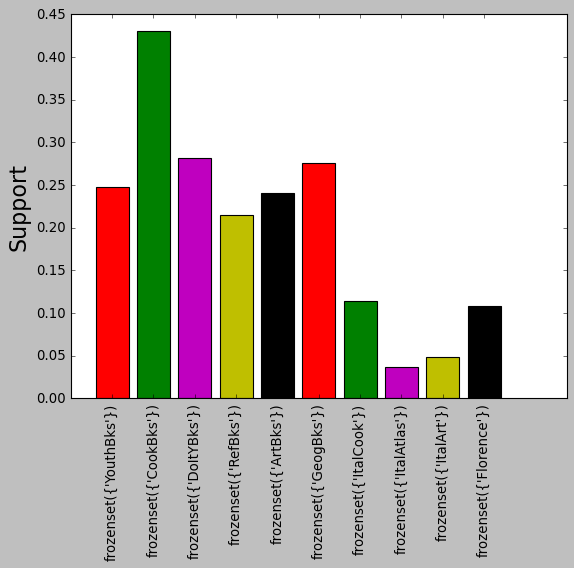

In [88]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_2.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_2.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

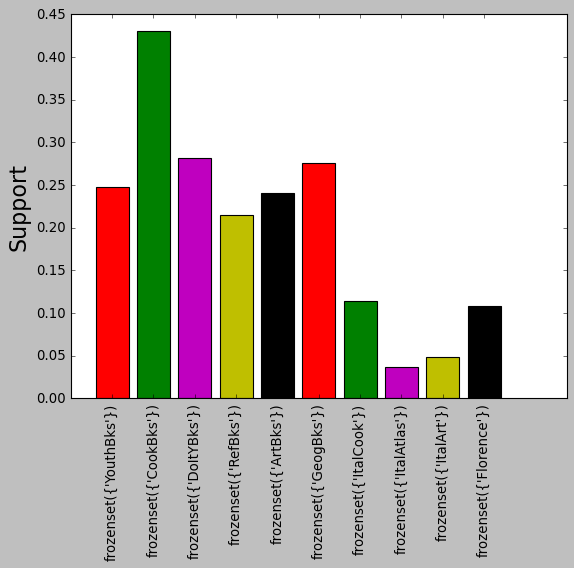

In [89]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_3.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_3.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

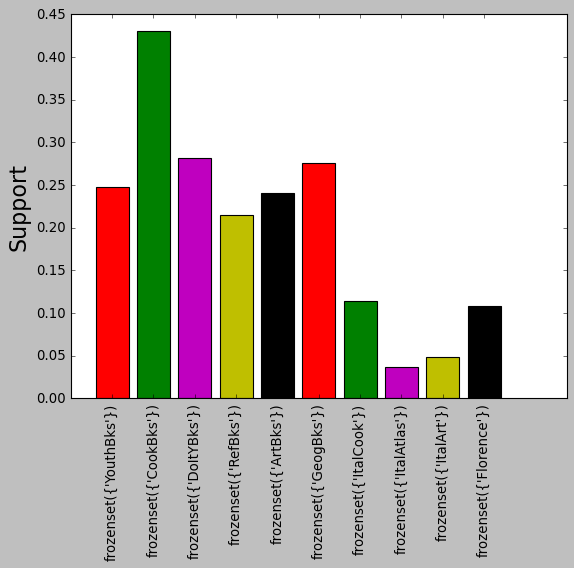

In [90]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_4.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_4.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

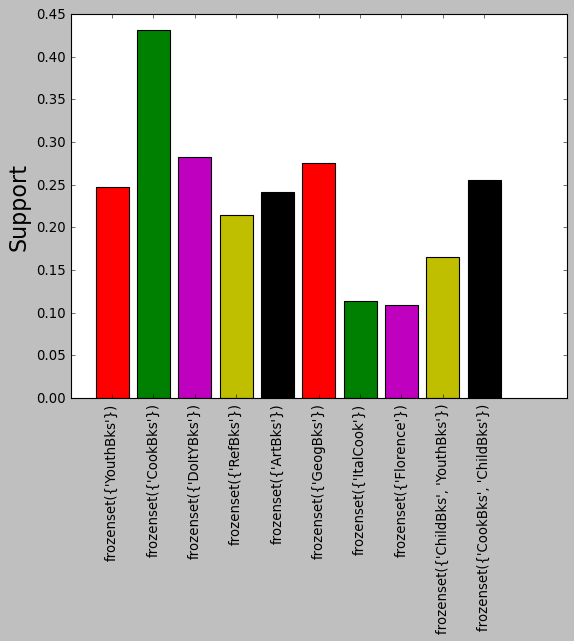

In [91]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_5.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_5.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

Text(0, 0.5, 'Support')

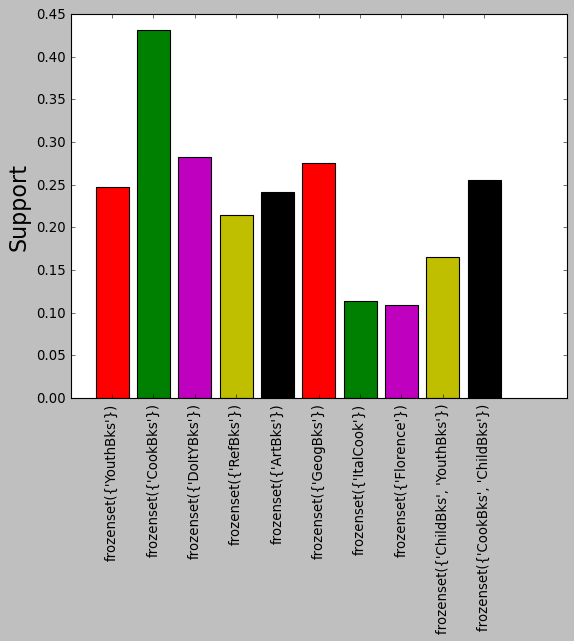

In [92]:
plt.style.use('classic')
plt.bar(x=list(range(1,11)),height=frequent_books_6.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_books_6.itemsets[1:11],rotation ='vertical')
plt.ylabel('Support', fontsize=20)

## Above plots shows the different number of sets we can produce with change in Support, confidence, Max_length and Min_thershold.